In [138]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [139]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Chicago Condo Regression

In [140]:
file_path = Path("../Resources/chi_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,135785.0,"Chicago, IL",-38.164588,-0.412697
1996-02-29,135573.0,"Chicago, IL",-0.156129,-38.164588
1996-03-31,135330.0,"Chicago, IL",-0.179239,-0.156129
1996-04-30,135097.0,"Chicago, IL",-0.172172,-0.179239
1996-05-31,134739.0,"Chicago, IL",-0.264995,-0.172172


<AxesSubplot:xlabel='date'>

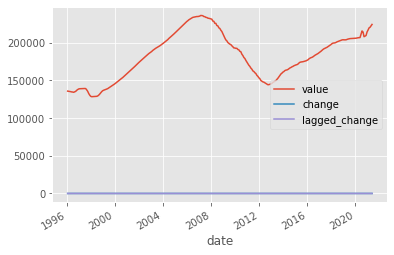

In [141]:
metro_df.plot()

In [142]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [143]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [144]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [145]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 8.12225793e-03, -2.28471868e+00,  2.37047398e-02,  2.23011630e-02,
        2.27304039e-02,  1.70928454e-02,  2.65159672e-02,  1.75287154e-02,
        5.82511452e-02,  6.32845097e-02,  9.45197093e-02,  7.75726695e-02,
        6.91870300e-02,  4.62845107e-02,  3.64216709e-02,  4.15312484e-02,
        3.13984802e-02,  4.26132360e-02,  2.76099959e-02,  2.92621127e-02,
       -4.01714424e-02, -5.05656269e-02, -9.71100913e-02, -6.54538201e-02,
       -4.17241539e-02,  9.53802650e-03,  3.71125627e-02,  3.87642477e-02,
        3.87591311e-02,  3.62536536e-02,  3.66293301e-02,  5.51008823e-02,
        8.33370827e-02,  9.82486594e-02,  1.11106210e-01,  1.04523328e-01,
        8.99353168e-02,  6.27687451e-02,  5.24283952e-02,  5.40912202e-02,
        6.04938440e-02,  5.80916337e-02,  7.15703170e-02,  7.45403184e-02,
        7.51657376e-02,  6.41339513e-02,  6.90022482e-02,  7.31529600e-02,
        7.42376039e-02,  7.93513047e-02,  7.89615967e-02,  8.07179459e-02,
        7.73680760e-02,  

In [146]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.033187161791053535

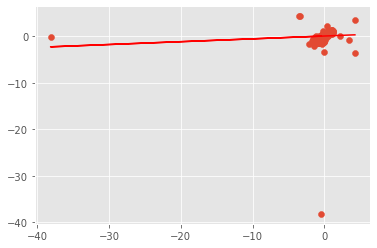

In [147]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [148]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [149]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.003688650966245266
R-squared (R2 ): 0.003688650966245266
Mean Squared Error (MSE): 5.469161444317086
Root Mean Squared Error (RMSE): 2.3386238355744786
Standard Deviation: 2.3429489882787333


In [150]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [151]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [152]:
# Train the data
#classifier.fit(X_train, y_train)

In [153]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [154]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [155]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [156]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [157]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [158]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [159]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [160]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [161]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [163]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 25
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [164]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [165]:
# Summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 3, 25)             2700      
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 25)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 3, 25)             5100      
_________________________________________________________________
dropout_13 (Dropout)         (None, 3, 25)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_14 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [166]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.2957
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.2039
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1972
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1945
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1938
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1936
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1815
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1912
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1754
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1756


In [167]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 1.0017


1.0016759634017944

In [168]:
# Make some predictions
predicted = model.predict(X_test)

In [169]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [170]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.head()

,Real,Predicted
date,,
2016-04-30,0.497296,-1.083199
2016-05-31,-0.737942,-0.297621
2016-06-30,-1.531514,0.175837
2016-07-31,-0.455767,0.345428
2016-08-31,1.253012,-0.544004


<AxesSubplot:xlabel='date'>

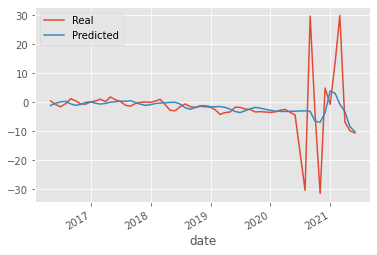

In [171]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [172]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)